In [3]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
normal_cells=os.listdir('C:/Users/vishv/OneDrive/Documents/AIML_2/Project/data-collection/Brain_tumor_data/no')

print(normal_cells[0:5])
print(normal_cells[-5:])

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg']
['No18.jpg', 'No19.jpg', 'No20.jpg', 'No21.jpg', 'No22.jpg']


In [6]:
tumor_cells=os.listdir('C:/Users/vishv/OneDrive/Documents/AIML_2/Project/data-collection/Brain_tumor_data/yes')

print(tumor_cells[0:5])
print(tumor_cells[-5:])

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']
['Y95.jpg', 'Y96.jpg', 'Y97.JPG', 'Y98.JPG', 'Y99.JPG']


In [7]:
print('Length of the Normal Brain Cells: ',len(normal_cells))
print('Length of the Cancurus Brain Cells: ',len(tumor_cells))

Length of the Normal Brain Cells:  98
Length of the Cancurus Brain Cells:  155


**Creating the label**

In [8]:
normal_label=[0]*98
tumor_label=[1]*155

In [9]:
print('Normal Cell labels: ',len(normal_label))
print('Tumor Cell labels: ',len(tumor_label))

Normal Cell labels:  98
Tumor Cell labels:  155


In [10]:
print('With Normal labels: ',normal_label[0:5])
print('With Tumor labels: ',tumor_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
With Tumor labels:  [1, 1, 1, 1, 1]


**Combining both labels into single column**

In [11]:
labels=normal_label+tumor_label

print('Total labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Total labels are:  253
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [12]:
type(labels)

list

**Data Visualization**

Normal Cell

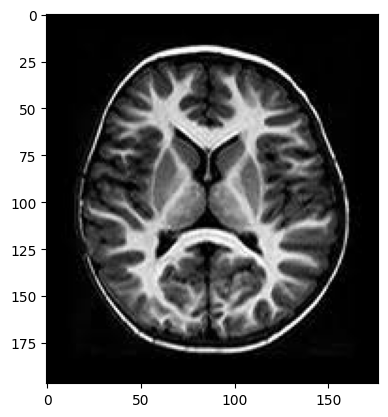

In [13]:
nor_img=mpimg.imread('C:/Users/vishv/OneDrive/Documents/AIML_2/Project/data-collection/Brain_tumor_data/no/14 no.jpg')
plt.imshow(nor_img)

Tumor Cell

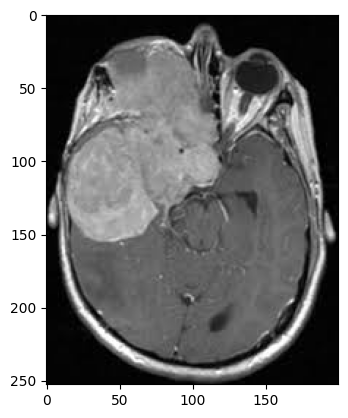

In [14]:
tum_img=mpimg.imread('C:/Users/vishv/OneDrive/Documents/AIML_2/Project/data-collection/Brain_tumor_data/yes/Y106.jpg')

plt.imshow(tum_img)

Distribution of the labeled column

<Axes: ylabel='count'>

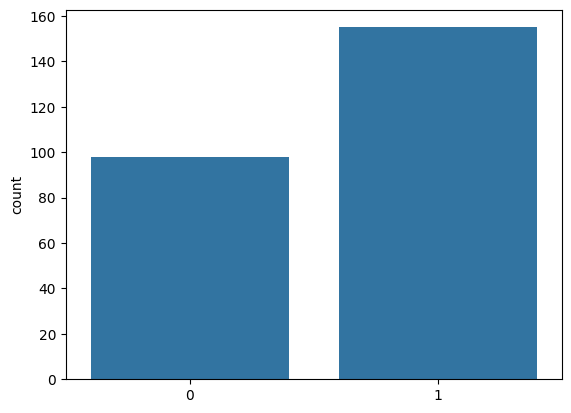

In [15]:
import seaborn as sn


sn.countplot(x=labels)

In [16]:
normal_path=('C:/Users/vishv/OneDrive/Documents/AIML_2/Project/data-collection/Brain_tumor_data/no/')
data=[]

for img_file in normal_cells:
    image=Image.open(normal_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    
tumor_path=('C:/Users/vishv/OneDrive/Documents/AIML_2/Project/data-collection/Brain_tumor_data/yes/')

for img_file in tumor_cells:
    image=Image.open(tumor_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [17]:
type(data)

list

In [18]:
len(data)

253

In [19]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [20]:
data[0].shape

(128, 128, 3)

**Converting data and labels into numpy array**

In [21]:
X=np.array(data)
Y=np.array(labels)

In [22]:
type(X)
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(253, 128, 128, 3)
(253,)


**Train Test Split**

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(253, 128, 128, 3) (202, 128, 128, 3) (51, 128, 128, 3)


**Scaling the Data**

In [26]:
X_train=X_train/255
X_test=X_test/255

**Model Building**

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout

In [28]:
num_of_classes=2

model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_of_classes, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history=model.fit(X_train,Y_train, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
6/6 [==============================] - 4s 361ms/step - loss: 13.0675 - accuracy: 0.4972 - val_loss: 4.7160 - val_accuracy: 0.6190
Epoch 2/50
6/6 [==============================] - 2s 273ms/step - loss: 4.5897 - accuracy: 0.6685 - val_loss: 1.1949 - val_accuracy: 0.7619
Epoch 3/50
6/6 [==============================] - 2s 281ms/step - loss: 1.7613 - accuracy: 0.7072 - val_loss: 0.5709 - val_accuracy: 0.8095
Epoch 4/50
6/6 [==============================] - 2s 282ms/step - loss: 0.5735 - accuracy: 0.8122 - val_loss: 0.5676 - val_accuracy: 0.8095
Epoch 5/50
6/6 [==============================] - 2s 272ms/step - loss: 0.2981 - accuracy: 0.9006 - val_loss: 0.6897 - val_accuracy: 0.8571
Epoch 6/50
6/6 [==============================] - 2s 275ms/step - loss: 0.2244 - accuracy: 0.9448 - val_loss: 0.5227 - val_accuracy: 0.8571
Epoch 7/50
6/6 [==============================] - 2s 278ms/step - loss: 0.1357 - accuracy: 0.9669 - val_loss: 0.9260 - val_accuracy: 0.8095
Epoch 8/50
6/6 [===

**Model Evaluation**

In [31]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 58ms/step - loss: 0.9524 - accuracy: 0.8824


[0.952393651008606, 0.8823529481887817]

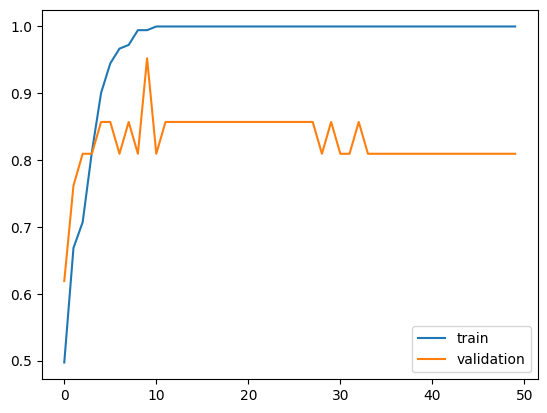

In [32]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()
plt.show()

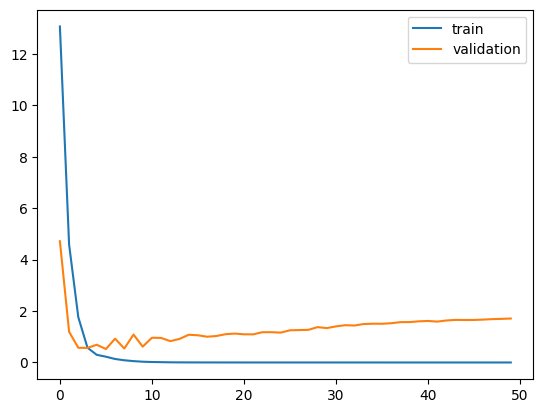

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.legend()
plt.show()

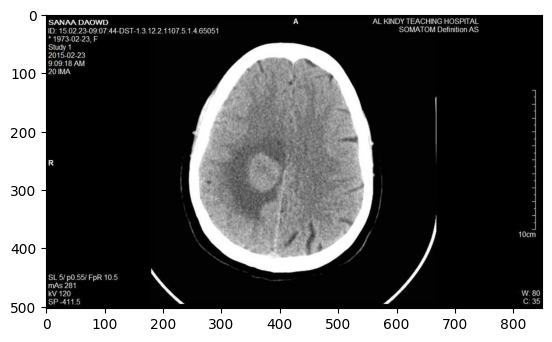

1/1 [==============================] - 0s 73ms/step
Prediction Probabilities are:   [[0.05863577 0.38442338]]
Tumor Cell


In [35]:
input_image_path=input('Enter the path of the image: ')

input_image=cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()


# Ensure the shape matches the expected input shape of your model
input_image_reshape=cv2.resize(input_image,(128,128))


# Normalize the pixel values
image_normalized=input_image_reshape/255


# Reshape for model prediction
img_reshape=np.reshape(image_normalized,(1,128,128,3))


# Make Predictions
input_prediction=model.predict(img_reshape)

# Display the prediction Probabilities
print('Prediction Probabilities are:  ',input_prediction)


# Get the Predicted Label
input_pred_label=np.argmax(input_prediction)


if input_pred_label ==1:
    print('Tumor Cell')
else:
    print('Normal Cell')

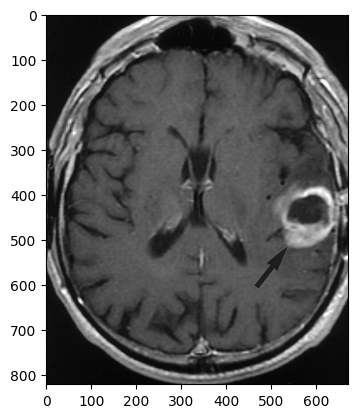

1/1 [==============================] - 0s 22ms/step
Prediction Probabilities are:   [[0.03541246 0.06964099]]
Tumor Cell


In [40]:
input_image_path=input('Enter the path of the image: ')

input_image=cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()


# Ensure the shape matches the expected input shape of your model
input_image_reshape=cv2.resize(input_image,(128,128))


# Normalize the pixel values
image_normalized=input_image_reshape/255


# Reshape for model prediction
img_reshape=np.reshape(image_normalized,(1,128,128,3))


# Make Predictions
input_prediction=model.predict(img_reshape)

# Display the prediction Probabilities
print('Prediction Probabilities are:  ',input_prediction)


# Get the Predicted Label
input_pred_label=np.argmax(input_prediction)


if input_pred_label ==1:
    print('Tumor Cell')
else:
    print('Normal Cell')